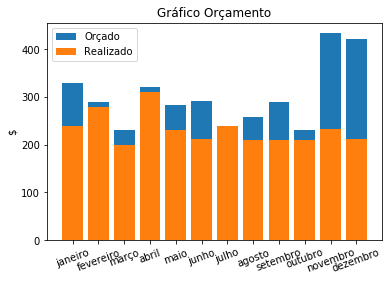

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

dfo = pd.read_excel('https://github.com/nilltonpimenta/desafio-tecnico/raw/master/dados.xlsx', 'orcado')
#print(dfo.values)

dfr = pd.read_excel('https://github.com/nilltonpimenta/desafio-tecnico/raw/master/dados.xlsx', 'realizado').T.iloc[1:] #transpõe os dados de "realizado" em seguida exclui primeira linha
dfr.columns = ['mês', 'realizado'] #nomeia as novas colunas
#print(dfr.values)

dt_merged = dfo.merge(dfr, left_on='mês', right_on='mês') #merge das tabelas utilizando os dados
#print(dt_merged.values)

dt_merged['diff'] = dt_merged['orcado'] - dt_merged['realizado'] #cria nova coluna calculando a diferença entre orcado e realizado
#print("\nNova coluna com a diferença entre orçado e realizado:\n", dt_merged)

dt_merged.to_csv(index=False, path_or_buf='dados_saida.csv') #exporta o arquivo de saída em .CSV.

#dt_merged.plot(kind='bar', x='mês', y=['orcado', 'realizado'], figsize=(15, 10), fontsize=10, stacked='False') é outro tipo de gráfico
m = 12
ind = np.arange(m)    # a localização x para os grupos
p1 = plt.bar(ind, dt_merged.orcado)
p2 = plt.bar(ind, dt_merged.realizado)
plt.ylabel('$')
plt.title('Gráfico Orçamento')
plt.xticks(ind, dt_merged.mês, rotation=20) #tirar "rotation=20" para meses na horizontal
plt.legend((p1, p2), ('Orçado', 'Realizado'))
plt.savefig('figura_saida.png') #exporta a imagem de saída do gráfico em .PNG
plt.show()